<a href="https://colab.research.google.com/github/YashD2109/internship_Cothon_solutions/blob/main/Task1_disease_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Introduction :
Provide a brief introduction to the dataset and the goal of the analysis.
Include:
Purpose of the analysis (e.g., predicting heart attack risk).
Description of the dataset (e.g., number of rows, columns, and key features like Blood Pressure, Cholesterol).
Steps involved (data cleaning, feature selection, model training, and evaluation).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix


For disease prediction heart_attack_prediction_dataset.csv analysis is taken.

In [ ]:
data = pd.read_csv("/content/heart_attack_prediction_dataset.csv")


2. Data Cleaning and Preprocessing :
Detail the steps taken to handle missing values and preprocess data.
Include:
Missing Values: Add a summary of missing values before and after imputation:

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Impute missing values (e.g., with mean)
imputer = SimpleImputer(strategy='mean')
data['Cholesterol'] = imputer.fit_transform(data[['Cholesterol']])

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


In [ ]:
# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['Sex', 'Smoking', 'Diabetes', 'Family History', 'Obesity', 'Diet', 'Previous Heart Problems', 'Medication Use'])

# Create a new feature for age groups
data['Age_Group'] = pd.cut(data['Age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81+'])
data = pd.get_dummies(data, columns=['Age_Group'])

Blood Pressure Splitting: Show examples of the original Blood Pressure column and how it was split into Systolic and Diastolic:

In [ ]:
def split_blood_pressure(df):
    """Splits the 'Blood Pressure' column into 'Systolic' and 'Diastolic'.

    Args:
        df: The pandas DataFrame containing the 'Blood Pressure' column.

    Returns:
        The DataFrame with added 'Systolic' and 'Diastolic' columns
        and the 'Blood Pressure' column dropped.
    """
    df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(float)
    df.drop('Blood Pressure', axis=1, inplace=True)
    return df

data = split_blood_pressure(data)


In [ ]:
X = data.drop(['Heart Attack Risk','Patient ID','Country','Continent','Hemisphere'], axis=1)
y = data['Heart Attack Risk']

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Create a base model
model = LogisticRegression()

# Create RFE object and select top 10 features
rfe = RFE(model, n_features_to_select=10)
rfe = rfe.fit(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]

# Create new DataFrame with selected features
X_selected = X[selected_features]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
from sklearn.linear_model import LassoCV

# Create LassoCV object
lasso = LassoCV()
lasso.fit(X, y)

# Get selected features (coefficients != 0)
selected_features = X.columns[lasso.coef_ != 0]

# Create new DataFrame with selected features
X_selected = X[selected_features]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model Training and Evaluation:
Provide details on the models used and their performance.
Include:
Accuracy, ROC-AUC, and Confusion Matrix for each model:

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

models = {
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"{name}:")
    print(f"Accuracy: {accuracy}")
    print(f"ROC-AUC: {roc_auc}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print("-" * 20)

SVM:
Accuracy: 0.6417569880205363
ROC-AUC: 0.4917459306440199
Confusion Matrix:
[[1125    0]
 [ 628    0]]
--------------------
Decision Tree:
Accuracy: 0.5407872219053051
ROC-AUC: 0.49746638358103323
Confusion Matrix:
[[730 395]
 [410 218]]
--------------------
Random Forest:
Accuracy: 0.5396463205932687
ROC-AUC: 0.49977494692144375
Confusion Matrix:
[[726 399]
 [408 220]]
--------------------
XGBoost:
Accuracy: 0.6252139189960069
ROC-AUC: 0.5137579617834395
Confusion Matrix:
[[1057   68]
 [ 589   39]]
--------------------


Exploratory Data Analysis (EDA) :
Include visualizations to better understand the data.
Include:
Heatmap of correlations: Show the relationship between features and the target variable.


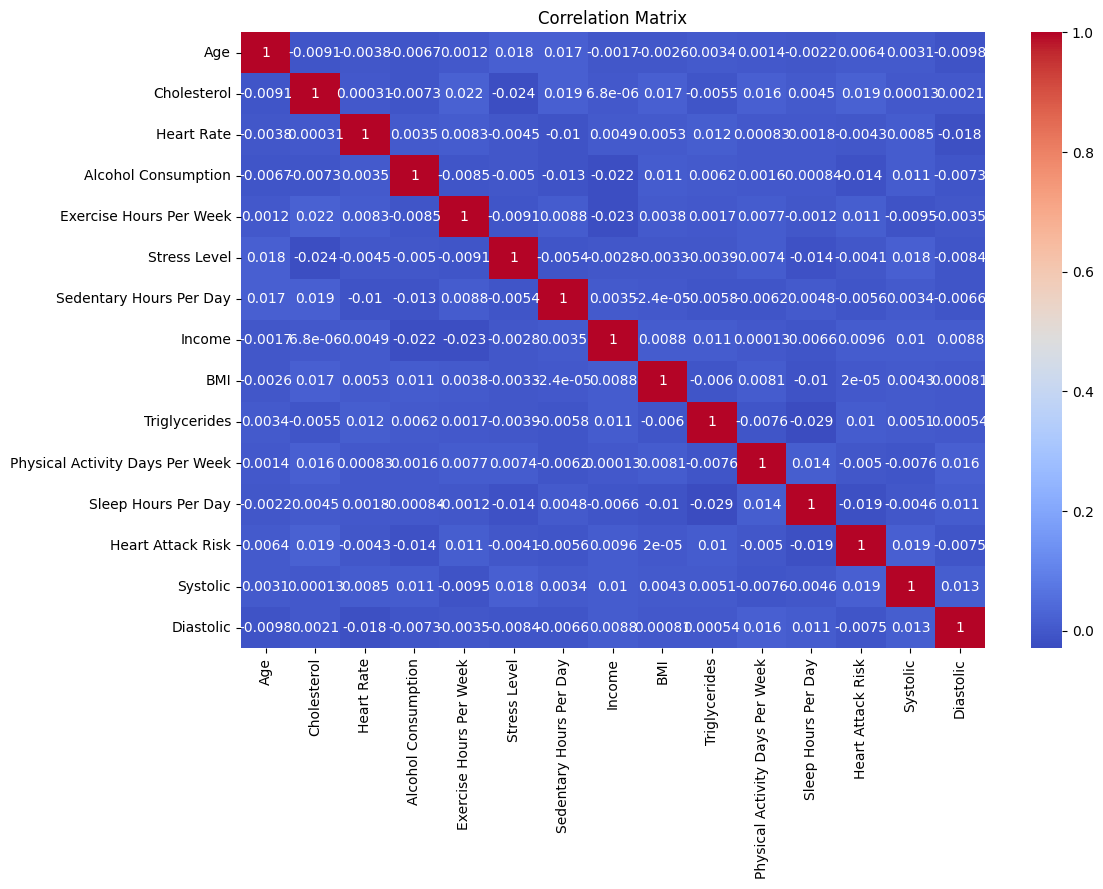

In [ ]:
plt.figure(figsize=(12, 8))
# Select only numeric features for correlation analysis
numeric_data = data.select_dtypes(include=np.number)
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Pair Plot: Highlight feature relationships with the target variable:

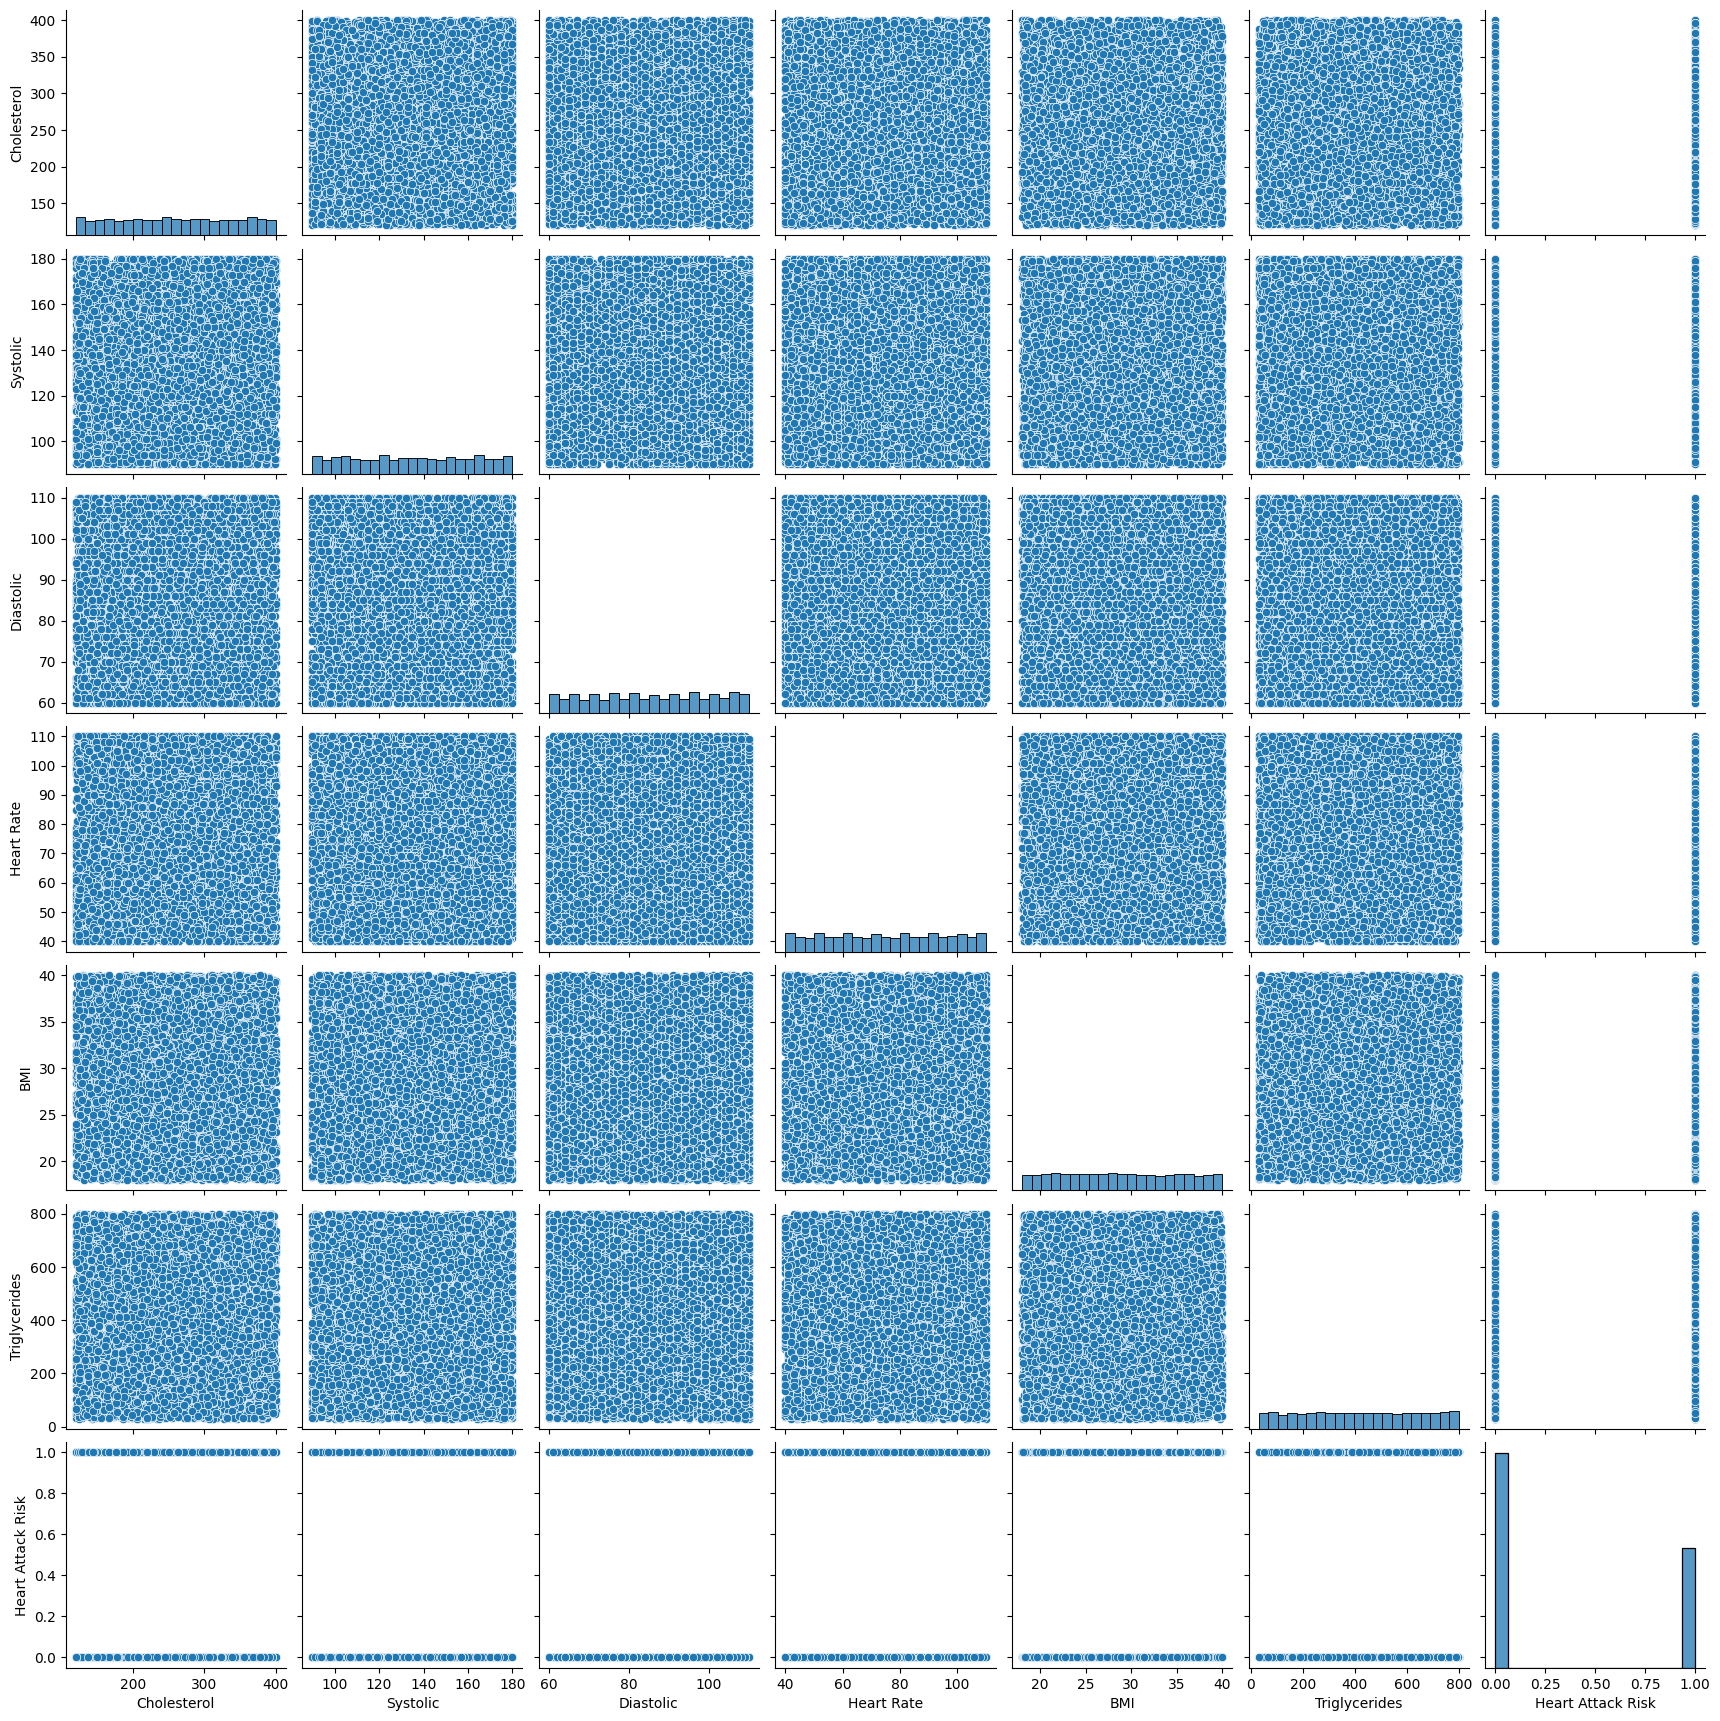

In [ ]:
sns.pairplot(data[['Cholesterol', 'Systolic', 'Diastolic', 'Heart Rate', 'BMI', 'Triglycerides', 'Heart Attack Risk']]) # Replace 'Blood Pressure' with 'Systolic' and 'Diastolic'
plt.show()

Cross-Validation :
Add a summary of cross-validation scores for models like Random Forest

In [ ]:
from sklearn.model_selection import cross_val_score

# Example with Random Forest
scores = cross_val_score(RandomForestClassifier(), X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean()}")


Cross-validation scores: [0.55492154 0.56276748 0.55135521 0.53138374 0.55920114]
Mean accuracy: 0.5519258202567761


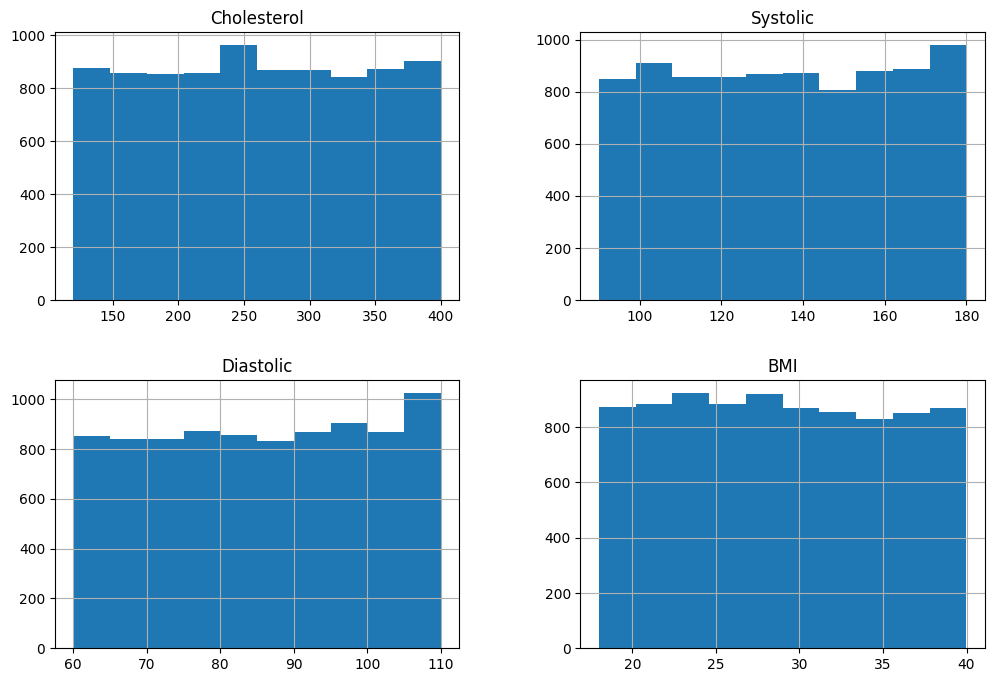

In [ ]:
data[['Cholesterol', 'Systolic', 'Diastolic', 'BMI']].hist(figsize=(12, 8))
plt.show()


Conclusion:
Provide actionable insights or recommendations based on the analysis.
For example:
High Cholesterol and Systolic Blood Pressure are key indicators of heart attack risk.
Random Forest or XGBoost might be preferred models for prediction in this scenario.
